In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import json 

c:\Users\91790\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [4]:
data.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- **hotel**: Type of hotel (Resort or City).
- **is_canceled**: Whether the booking was canceled (1) or not (0).
- **lead_time**: Number of days between booking and arrival.
- **arrival_date_year**: Year of arrival.
- **arrival_date_month**: Month of arrival.
- **arrival_date_week_number**: Week number of the arrival year.  
- **arrival_date_day_of_month**: Day of the month of arrival.
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay.
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay.
- **adults**: Number of adults.
- **children**: Number of children.
- **babies**: Number of babies.
- **meal**: Type of meal booked.  
- **country**: Country of origin of the guest.
- **market_segment**: Market segment designation.
- **distribution_channel**: Booking distribution channel.
- **is_repeated_guest**: Whether the guest is a repeated guest (1) or not (0).  
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking.
- **previous_bookings_not_canceled**: Number of previous bookings that were not cancelled by the customer prior to the current booking.  
- **reserved_room_type**: Code of room type reserved.  
- **assigned_room_type**: Code of room type assigned.
- **booking_changes**: Number of changes made to the booking.  
- **deposit_type**: Indication of if the customer made a deposit to guarantee the booking.
- **agent**: ID of the travel agent who made the booking.
- **company**: ID of the company/entity that made the booking or responsible for paying the booking.  
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
- **customer_type**: Type of booking, assuming one of four categories.  
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- **required_car_parking_spaces**: Number of car parking spaces required by the customer.
- **total_of_special_requests**: Number of special requests made by the customer.  
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled, Check-Out, No-Show  
- **reservation_status_date**: Date when the last status was set. 

### **Exploratory Data Analysis**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [7]:
# Numerical columns
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

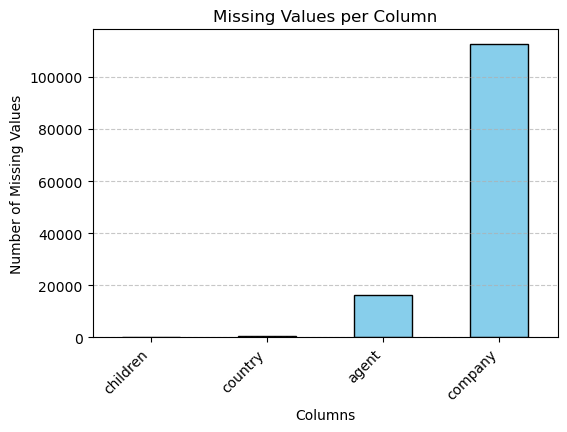

In [8]:
# Plot missing values
def plot_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]  # Filter only columns with missing values
    
    if missing_counts.empty:
        print("No missing values found in the dataset.")
        return
    
    plt.figure(figsize=(6, 4))
    missing_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.title("Missing Values per Column")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_missing_values(data)

In [9]:
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Filter only columns with missing values

In [10]:
missing_counts

children         4
country        488
agent        16340
company     112593
dtype: int64

Handling Missing Values 

In [11]:
data.children.value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [12]:
# Fill missing values in 'children' column with 0
data['children'] = data['children'].fillna(0)

In [13]:
# data.country.value_counts()

In [14]:
# Fill missing values in 'country' column with mode 
data['country'] = data['country'].fillna(data['country'].mode()[0])

Since, agents are often specific to certain market segments (corporate, online, travel agencies, etc). We will fill these missing values based on correlation of 'agents' with 'market_segment' 

In [15]:
data['agent'] = data.groupby('market_segment')['agent'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

Since, 'company' column has a lot of missing value, we will drop it 

In [16]:
data.drop(columns=['company'], inplace=True)

In [17]:
print(f"Total missing values in the dataset: {data.isnull().sum().sum()}")

Total missing values in the dataset: 0


In [17]:
num_cols.pop(num_cols.index('company'))

'company'

In [18]:
# --------------------------

Handling Categorical Data 

In [19]:
# Categories in each categorical column
for col in cat_cols[:len(cat_cols)-1]: 
    categories = data[col].unique()
    print(f"{col}: {len(categories)} categories")
    print(categories)
    print("\n")

hotel: 2 categories
['Resort Hotel' 'City Hotel']


arrival_date_month: 12 categories
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


meal: 5 categories
['BB' 'FB' 'HB' 'SC' 'Undefined']


country: 177 categories
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZ

### Data Transformations

In [19]:
# Rename columns
data.rename(columns={
    'arrival_date_year': 'year',
    'arrival_date_month': 'month',
    'arrival_date_day_of_month': 'day'
}, inplace=True)

In [22]:
data['month'] = pd.to_datetime(data['month'], format='%B').dt.month

In [23]:
data['arrival_date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [43]:
data.arrival_date 

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [50]:
data['arrival_day_of_week'] = data['arrival_date'].dt.day_name()

In [ ]:
data['is_weekend_arrival'] = data['arrival_date'].dt.weekday >= 5  # 5 = Saturday, 6 = Sunday

In [59]:
data['is_holiday_season'] = data['month'].isin([12, 1, 7, 8])  # Adjust based on holiday trends

### **Analytics**

Arrival Distribution by day of the week

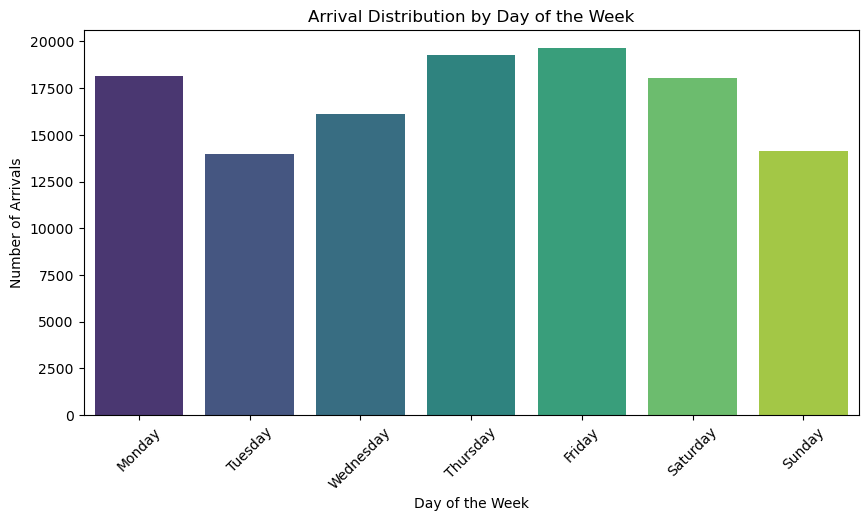

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['arrival_day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Arrival Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.show()

Weekend vs Weekday arrivals

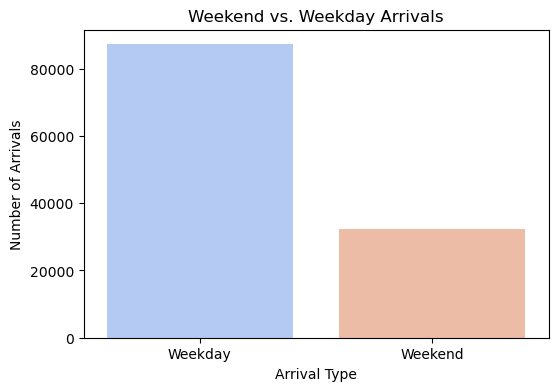

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['is_weekend_arrival'], palette='coolwarm')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title('Weekend vs. Weekday Arrivals')
plt.xlabel('Arrival Type')
plt.ylabel('Number of Arrivals')
plt.show()

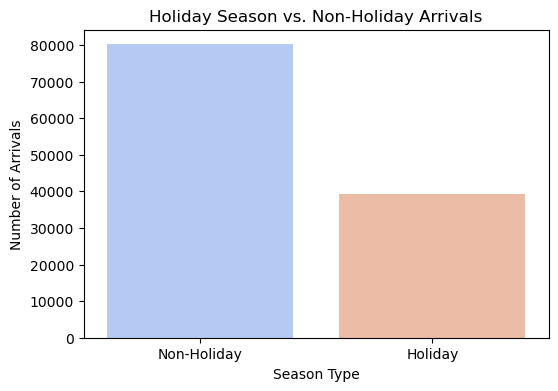

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['is_holiday_season'], palette='coolwarm')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Holiday Season vs. Non-Holiday Arrivals')
plt.xlabel('Season Type')
plt.ylabel('Number of Arrivals')
plt.show()

In [22]:
df = data.copy()

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Revenue Trends

In [26]:
# Calculate Revenue per booking 
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['revenue'] = df['adr'] * df['total_nights']

In [29]:
# Revenue over Time (monthly)
revenue_trend = df.groupby(df['reservation_status_date'].dt.to_period('M'))['revenue'].sum()

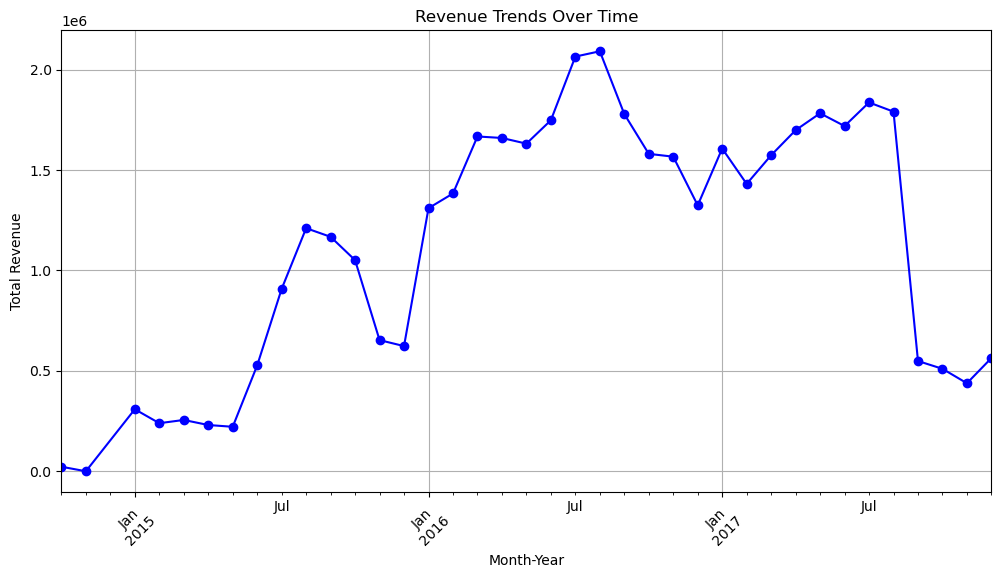

In [31]:
# plot 
plt.figure(figsize=(12, 6))
revenue_trend.plot(kind='line', marker='o', color='b')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Cancellation Rate as percentage of Total bookings

In [32]:
total_bookings = len(df)
canceled_bookings = df['is_canceled'].sum()
cancellation_rate = (canceled_bookings / total_bookings) * 100

In [33]:
print(f"Total Bookings: {total_bookings}")
print(f"Total Canceled Bookings: {canceled_bookings}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Total Bookings: 119390
Total Canceled Bookings: 44224
Cancellation Rate: 37.04%


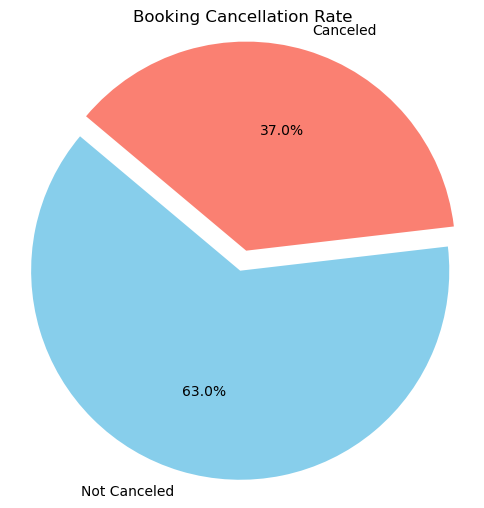

In [34]:
# plot these
plt.figure(figsize=(6, 6))

# Pie chart
labels = ['Not Canceled', 'Canceled']
sizes = [total_bookings - canceled_bookings, canceled_bookings]
colors = ['skyblue', 'salmon']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title("Booking Cancellation Rate")

plt.show()

Geographical Distribution of Users Booking Hotels

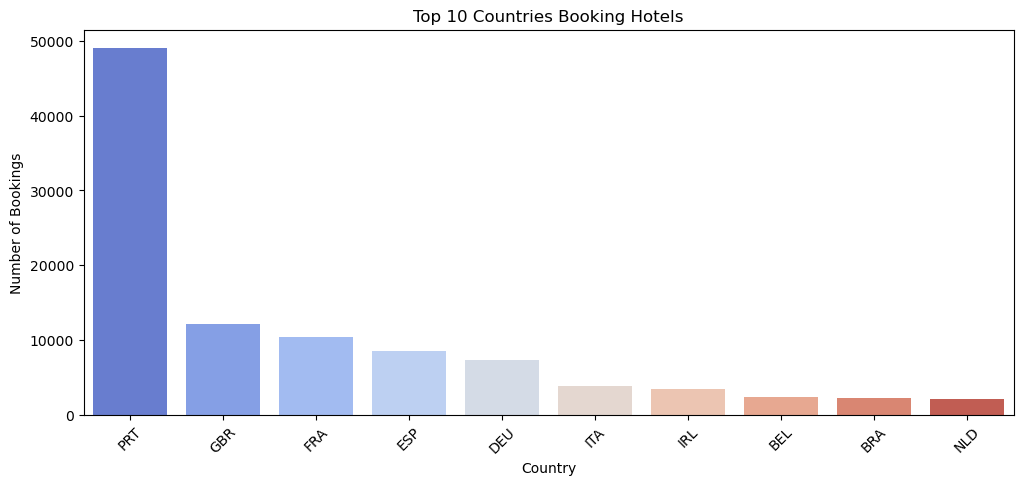

In [35]:
import seaborn as sns

# Count of bookings per country
country_bookings = df['country'].value_counts().head(10)  # Show top 10 countries

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=country_bookings.index, y=country_bookings.values, palette='coolwarm')
plt.title('Top 10 Countries Booking Hotels')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

Booking lead time Distribution

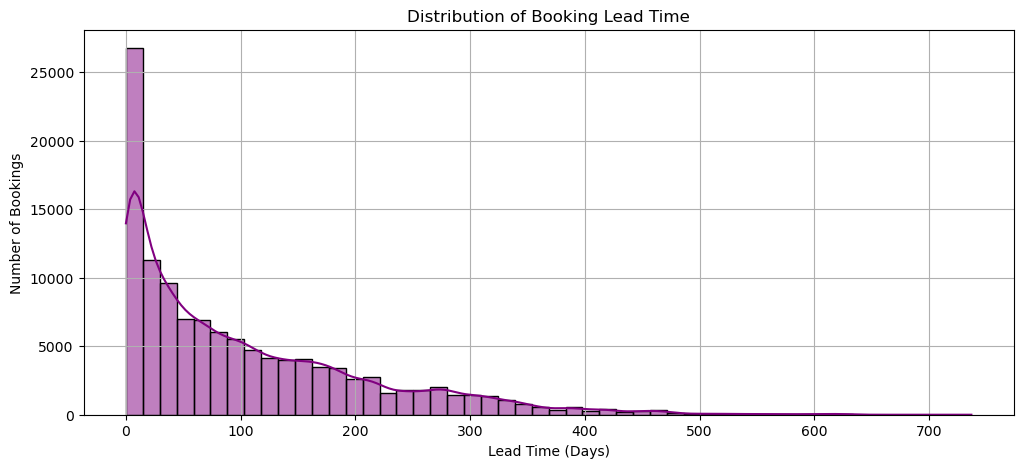

In [36]:
# Plot lead time distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='purple')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

Additional analytics

Revenue by distribution channel

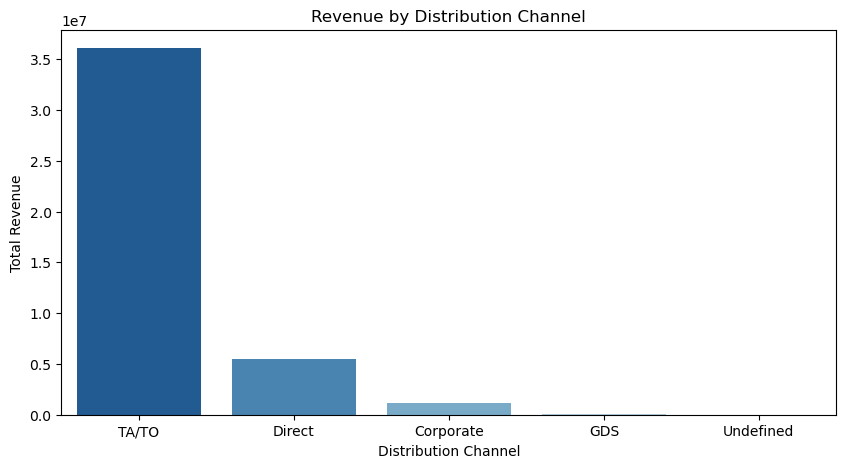

In [ ]:
channel_revenue = df.groupby('distribution_channel')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='Blues_r')
plt.title('Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Revenue')
plt.show()


Count of Reserved room types

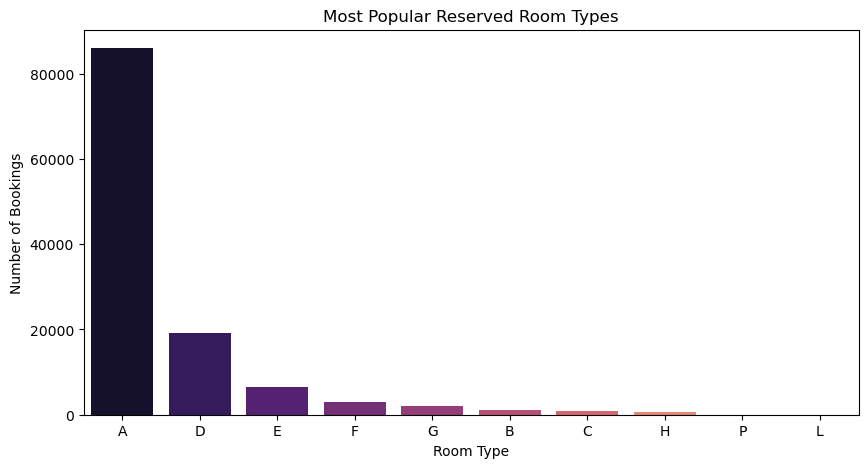

In [ ]:
# Count of reserved room types
room_counts = df['reserved_room_type'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=room_counts.index, y=room_counts.values, palette='magma')
plt.title('Most Popular Reserved Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.show()

Special Requests vs Cancellations

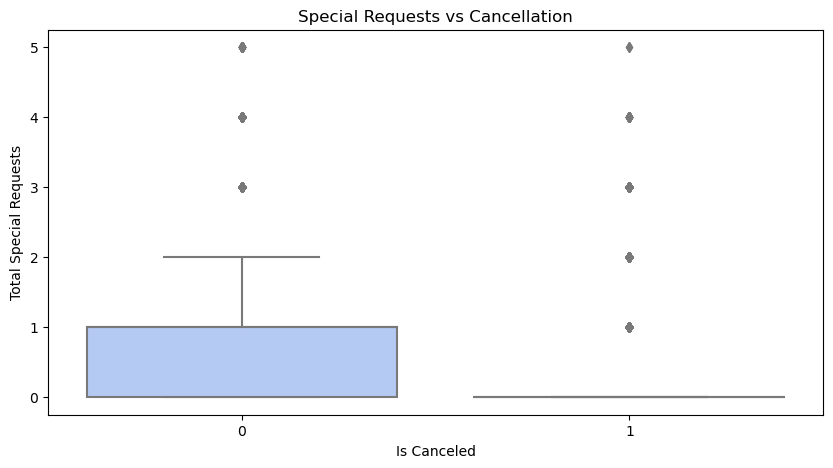

In [39]:
# Boxplot to see special requests vs cancellations
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette='coolwarm')
plt.title('Special Requests vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Total Special Requests')
plt.show()

Booking Trends by month

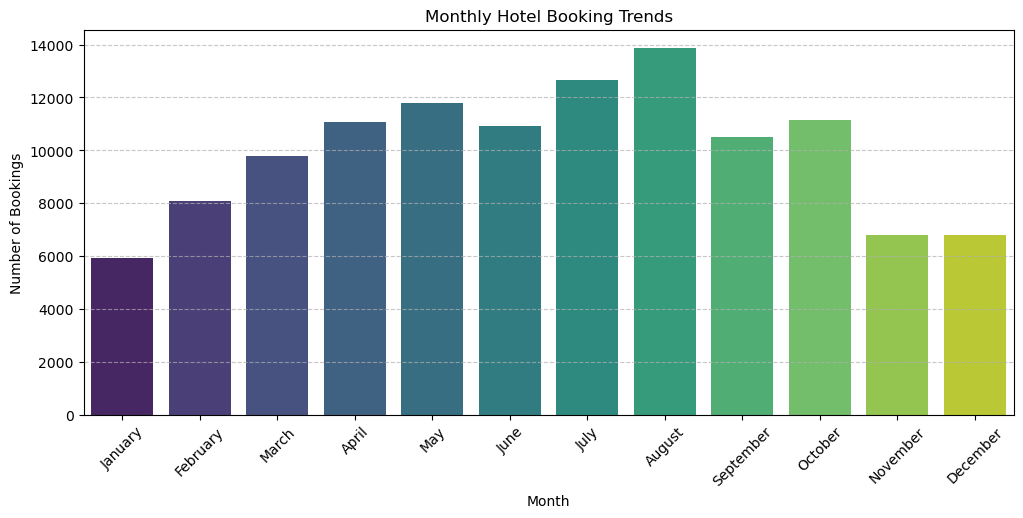

In [40]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['arrival_date_month'], order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
], palette='viridis')

plt.title('Monthly Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cancellation Rate vs Lead time

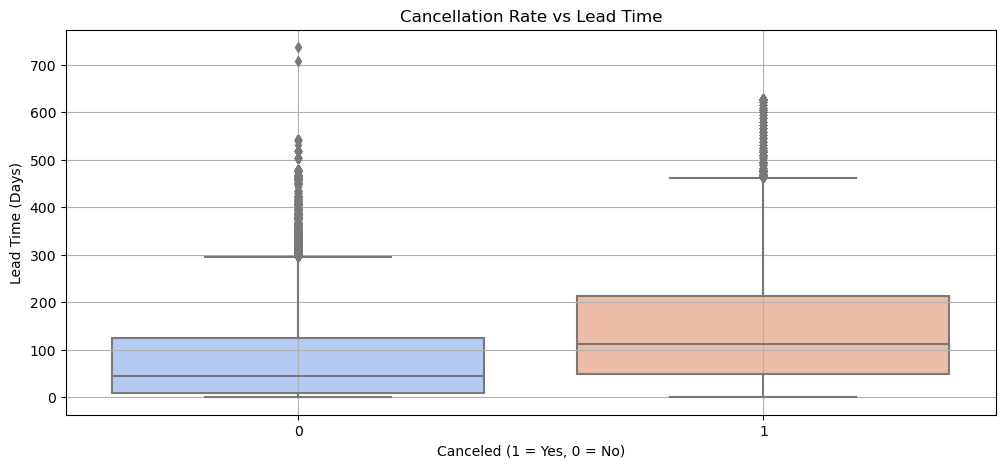

In [41]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['is_canceled'], y=df['lead_time'], palette='coolwarm')

plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Canceled (1 = Yes, 0 = No)')
plt.ylabel('Lead Time (Days)')
plt.grid(True)
plt.show()


Market Segment-wise Booking Distribution

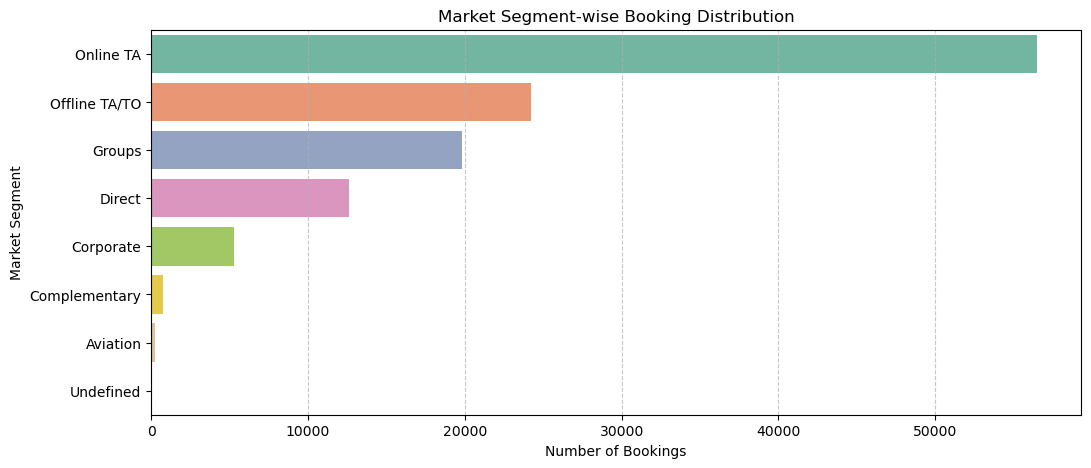

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['market_segment'], order=df['market_segment'].value_counts().index, palette='Set2')

plt.title('Market Segment-wise Booking Distribution')
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Cancellation Rate by Market Segment

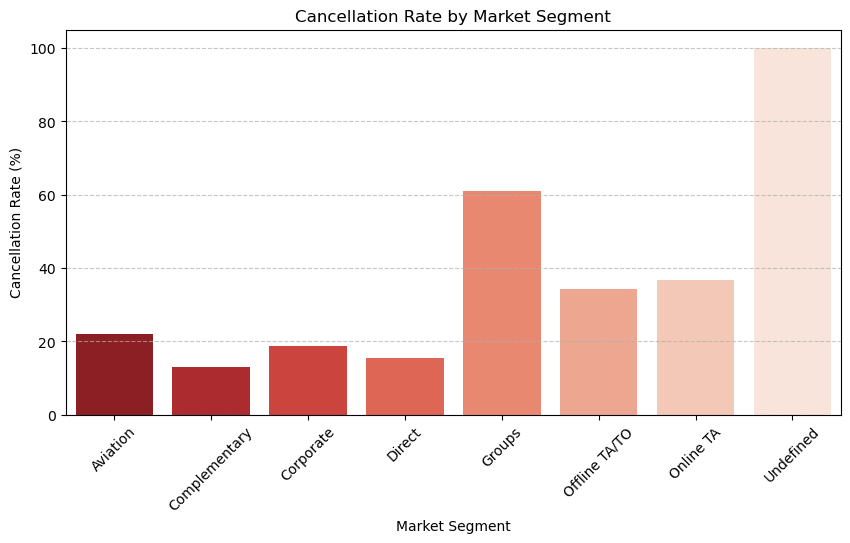

In [ ]:
segment_cancellation = df.groupby('market_segment')['is_canceled'].mean() * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=segment_cancellation.index, y=segment_cancellation.values, palette='Reds_r')

plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Room Mismatch

Room Mismatch Rate: 12.49%


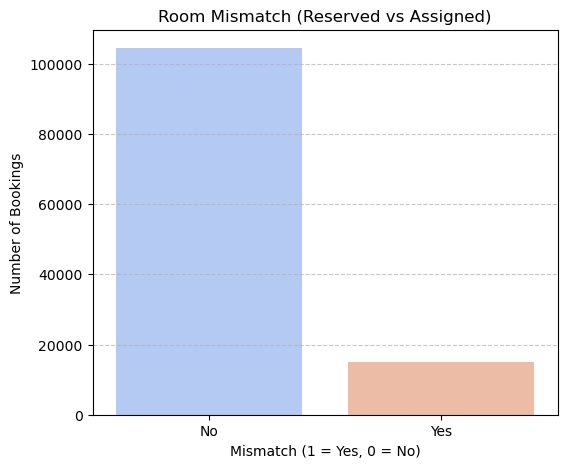

In [45]:
df['room_mismatch'] = df['reserved_room_type'] != df['assigned_room_type']
room_mismatch_rate = df['room_mismatch'].mean() * 100

print(f'Room Mismatch Rate: {room_mismatch_rate:.2f}%')

plt.figure(figsize=(6, 5))
sns.countplot(x=df['room_mismatch'].astype(int), palette='coolwarm')

plt.title('Room Mismatch (Reserved vs Assigned)')
plt.xlabel('Mismatch (1 = Yes, 0 = No)')
plt.ylabel('Number of Bookings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Booking Cancellation by Customer Type

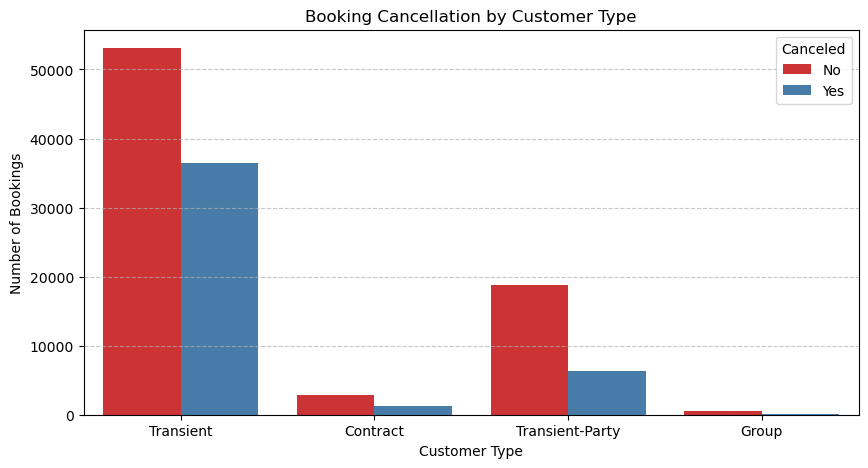

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['customer_type'], hue=df['is_canceled'], palette='Set1')

plt.title('Booking Cancellation by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.legend(title="Canceled", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,revenue,room_mismatch
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0,True


In [54]:
# save new 
df.to_csv("hotel_bookings_base.csv", index=False)

---